In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "potatodesease",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)


68

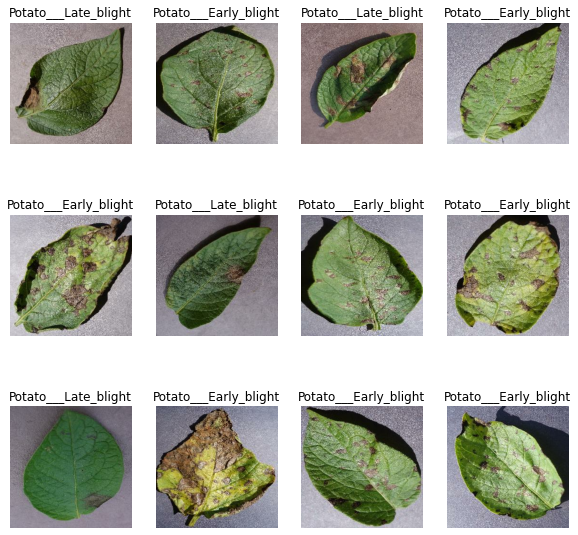

In [7]:
plt.figure(figsize =(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4 ,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        
    
    

In [8]:
len(dataset)

68

In [9]:
# 80%==> training
# 20%==> 10% validation and 10% testing

In [10]:
train_size = 0.8
len(dataset)* train_size

54.400000000000006

In [11]:
train_ds = dataset.take(54)

In [12]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [13]:
val_size = 0.1
len(dataset)* val_size

6.800000000000001

In [14]:
val_ds = test_ds.take(7)
len(val_ds)

7

In [15]:
test_ds = test_ds.skip(7)
len(test_ds)

7

In [16]:
def dataset_partitions_tf(ds,train_split=0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
        
    train_size = int(train_split * ds_size)
    test_size = int(test_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(test_size)
    test_ds = ds.skip(train_size).skip(test_size)
    return train_ds, val_ds, test_ds


In [17]:
train_ds, val_ds, test_ds = dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

54

In [19]:
len(val_ds)

6

In [20]:
len(test_ds)

8

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)])

In [23]:
data_augmentation =tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)])

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_class = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape =  input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation ='softmax')

])

In [25]:
model.build(input_shape = input_shape)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [27]:
model.compile(
optimizer = 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
metrics = ['accuracy']
)

In [28]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 123s 2s/step - loss: 1.2532 - accuracy: 0.4786 - val_loss: 0.9601 - val_accuracy: 0.4948
Epoch 2/50
54/54 [==============================] - 89s 2s/step - loss: 0.8742 - accuracy: 0.5561 - val_loss: 0.8352 - val_accuracy: 0.6667
Epoch 3/50
54/54 [==============================] - 85s 2s/step - loss: 0.6564 - accuracy: 0.7124 - val_loss: 1.3120 - val_accuracy: 0.6458
Epoch 4/50
54/54 [==============================] - 85s 2s/step - loss: 0.5201 - accuracy: 0.7755 - val_loss: 0.5870 - val_accuracy: 0.7344
Epoch 5/50
54/54 [==============================] - 89s 2s/step - loss: 0.4470 - accuracy: 0.8084 - val_loss: 0.6742 - val_accuracy: 0.6875
Epoch 6/50
54/54 [==============================] - 84s 2s/step - loss: 0.3419 - accuracy: 0.8698 - val_loss: 0.4789 - val_accuracy: 0.8333
Epoch 7/50
54/54 [==============================] - 88s 2s/step - loss: 0.2780 - accuracy: 0.8895 - val_loss: 0.4125 - val_accuracy: 0.8281
Epoch 8/50
54/54 [=

In [30]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 9s 383ms/step - loss: 0.0148 - accuracy: 0.9922


In [31]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']



Text(0.5, 1.0, 'Training and validation loss')

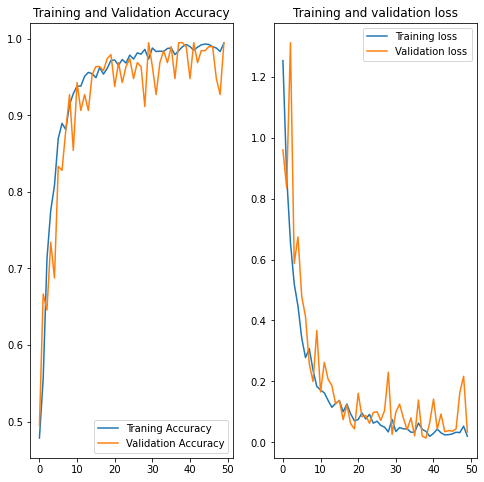

In [34]:
plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label = 'Traning Accuracy')
plt.plot(range(EPOCHS),val_acc, label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')

first image to predict:
actual label of image: Potato___Early_blight
Predicted label of image: Potato___Early_blight


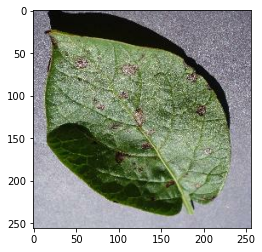

In [38]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label= label_batch[0]
    print("first image to predict:")
    plt.imshow(first_image)
    print("actual label of image:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted label of image:",class_names[np.argmax(batch_prediction[0])])

In [39]:
import numpy as np
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    
    predictions = model.predict(img_array)
    
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

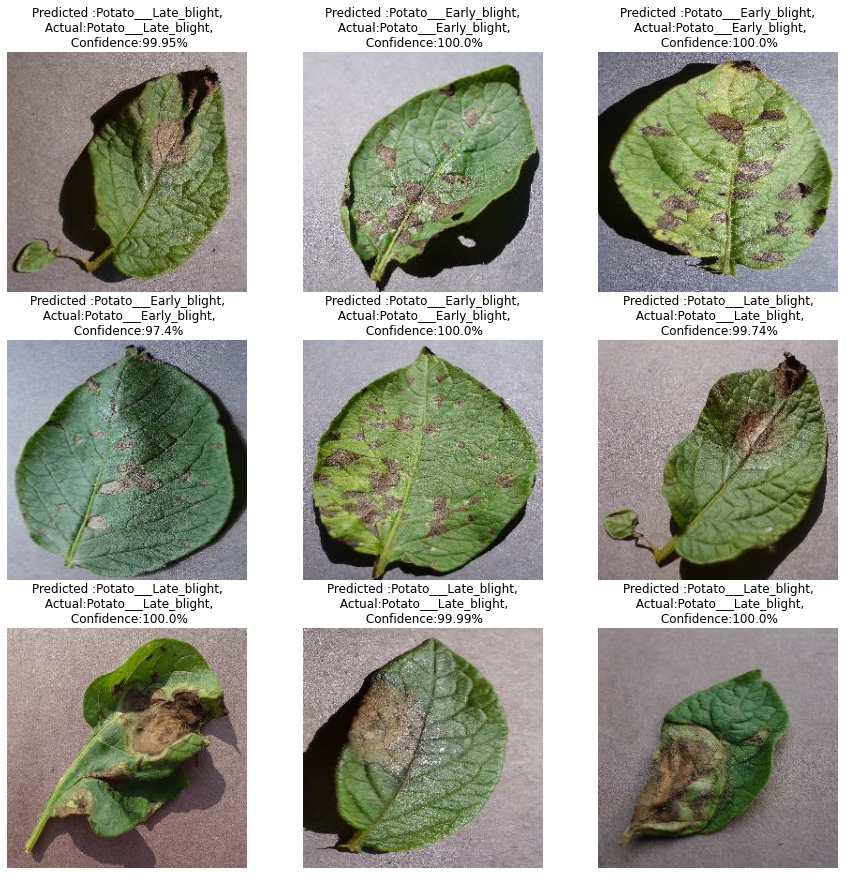

In [40]:
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        Predicted, confidence = predict(model,images[i].numpy())
        Actual = class_names[labels[i]]
        plt.title(f"Predicted :{Predicted},\n Actual:{Actual},\n Confidence:{confidence}%")
        

        plt.axis('off')

In [41]:
# import os
# model_version =1
model.save("potatod_model.h5")